In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


In [4]:
# Reading the data from file
strtdata = pd.read_csv('50_Startups.csv')

In [5]:
strtdata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
strtdata.shape

(50, 5)

In [7]:
# shows no null values. all looks good. 
# we have one category variable 
strtdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
strtdata.describe(include = 'all')

# minimum values of R&D spend and Marketing,and max of R&d spend seems outliers which might nedd to be removed

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


In [9]:
strtdata.isnull().sum()  # No Null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
# plotting correlation to see the colinearity
# as profit is out put no proble with high correlation
strtdata.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


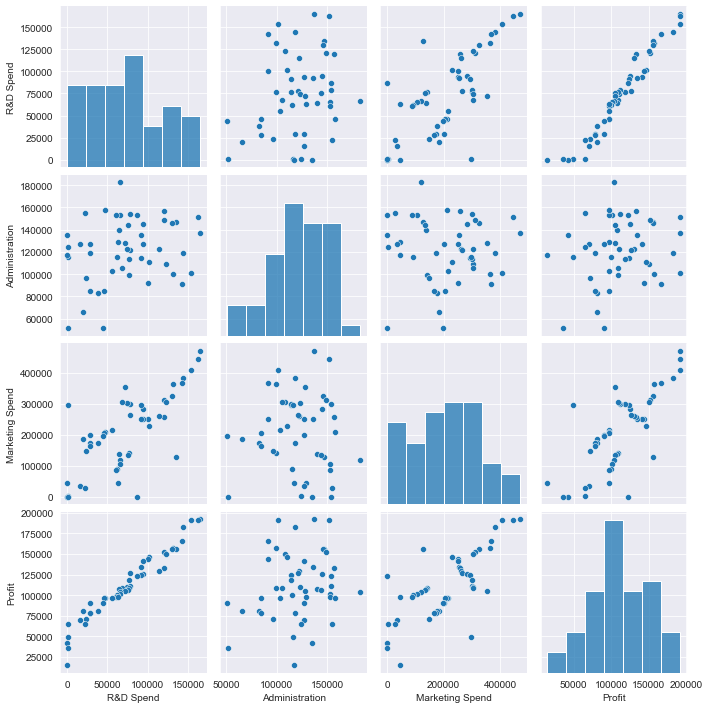

In [11]:
#plotting pair plot to examine the variables

sns.set_style(style='darkgrid')
sns.pairplot(strtdata)

In [12]:

strtdata.columns.values

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'], dtype=object)

In [13]:
#changing column names to avoid sapces and any invalid syntax
cols = {'R&D Spend': 'RDSpend', 'Administration':'Admin', 'Marketing Spend': 'MrktSpend', 'State':'State',
       'Profit':'Profit'}

In [14]:
strtdata_c = strtdata.rename (columns= cols , inplace = False)

In [15]:
strtdata_c.head()
# Looks good

,RDSpend,Admin,MrktSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
strtdata_c.columns.values

array(['RDSpend', 'Admin', 'MrktSpend', 'State', 'Profit'], dtype=object)

In [17]:
#Building simple  model
# profit is target value
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend+Admin+MrktSpend',data=strtdata_c).fit()

In [18]:
model.summary()
#Rsquare seeems pretty good but let us anayse it further
# the p value is more than 0.05 admin and marketing spend which means they have no affect on profit 
# but let us examine futher

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 21 May 2021   Prob (F-statistic):           4.53e-30
Time:                        17:02:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend        0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MrktSpend      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
lr_RD = smf.ols('Profit~RDSpend',data=strtdata_c).fit()
print(lr_RD.tvalues[1], '\n', lr_RD.pvalues[1])

29.151138989679435 
 3.500322243690248e-32


In [20]:
lr_Ad = smf.ols('Profit~Admin',data=strtdata_c).fit()
print(lr_Ad.tvalues[1], '\n', lr_Ad.pvalues[1])

1.4194927697454482 
 0.16221739470358154


In [21]:
lr_Ms = smf.ols('Profit~MrktSpend',data=strtdata_c).fit()
print(lr_Ms.tvalues[1], '\n', lr_Ms.pvalues[1])

7.802656886161833 
 4.3810731820310294e-10


In [22]:
# from above it true that the administrative costs have no effect on profits 
# but lets keep and check vif

In [25]:
# finding Vif values 
rs_RD = smf.ols('RDSpend~Admin+MrktSpend',data=strtdata_c).fit().rsquared
rs_Ad = smf.ols('Admin~RDSpend+MrktSpend',data=strtdata_c).fit().rsquared
rs_Ms = smf.ols('MrktSpend~Admin+RDSpend',data=strtdata_c).fit().rsquared

vif_RD = 1/(1-rs_RD)
vif_Ad = 1/(1-rs_Ad)
vif_Ms = 1/(1-rs_Ms)

In [26]:
d1 = {'Variables':['RDSpend', 'Admin', 'MrktSpend'],'VIF':[vif_RD, vif_Ad, vif_Ms]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDSpend,2.468903
1,Admin,1.175091
2,MrktSpend,2.326773


In [ ]:
#the vif scores are within limit so we can go for multilinear regression

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


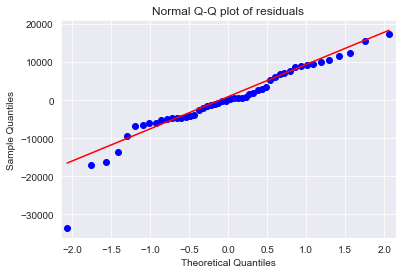

In [27]:
# Checking for any outliers
# some values seems to be not aligning with the data 
# lets examine the data further
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
#finding out values where the data is far from line 
# data point  49 seems way far from the rest of data
list(np.where(model.resid< -30000))

[array([49], dtype=int64)]

In [32]:
# lets standardise the values

def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

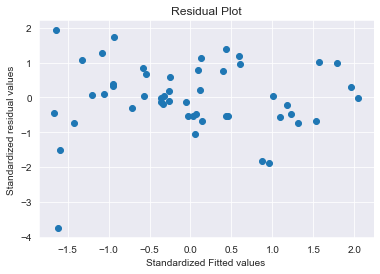

In [33]:
#Checking for Homoscedasticity 
# the residuals are spread randomly

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

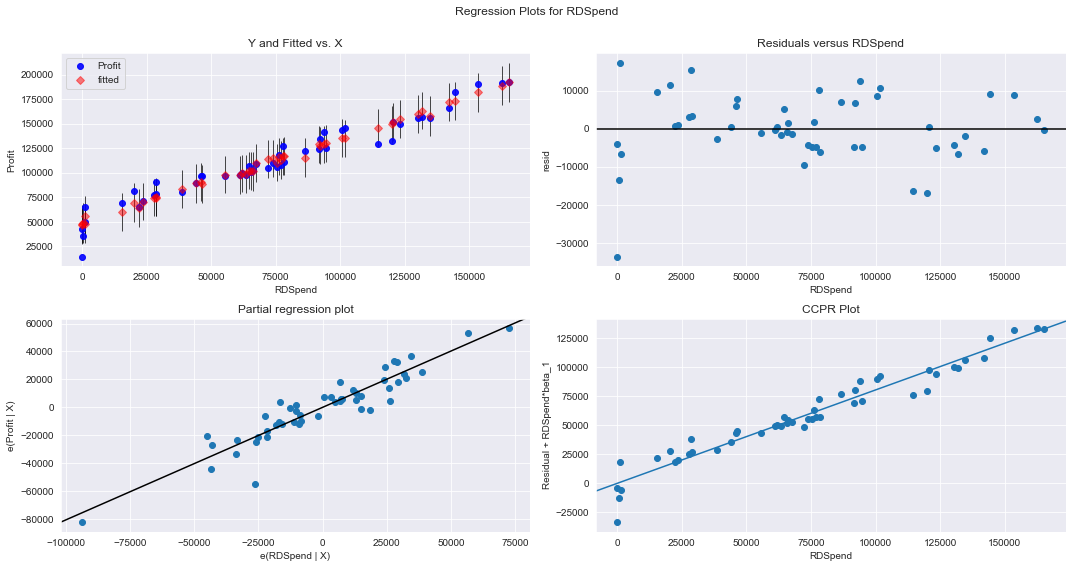

In [34]:
# partial regressions for checking of the relation
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

# the Rd spend has perfect linear relation 

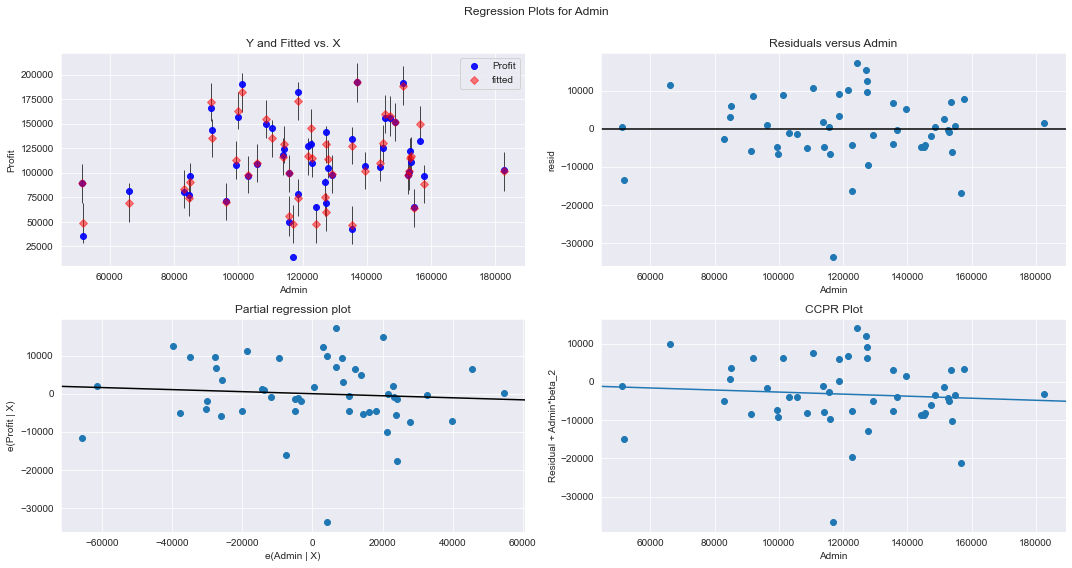

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin", fig=fig)
plt.show()
# the admin has some linear relation and it is effective

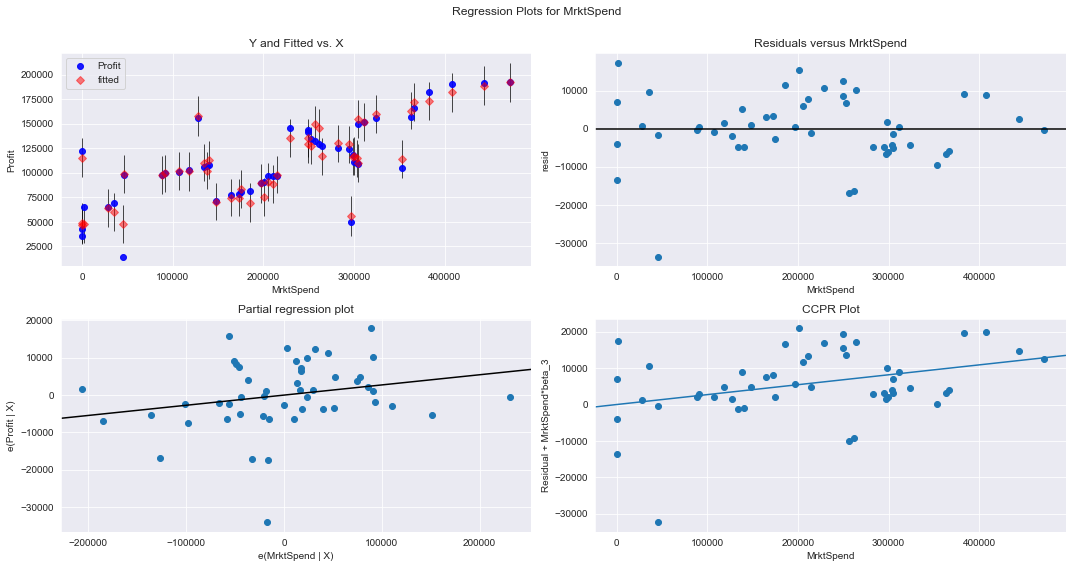

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MrktSpend", fig=fig)
plt.show()

# martket spend also has an effect on profit

In [37]:

#from sklearn.model_selection import train_test_split
#X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=7)
#as the data points are very less lets ignore the this

In [38]:
# Finding cooks distance to check influencing oints
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

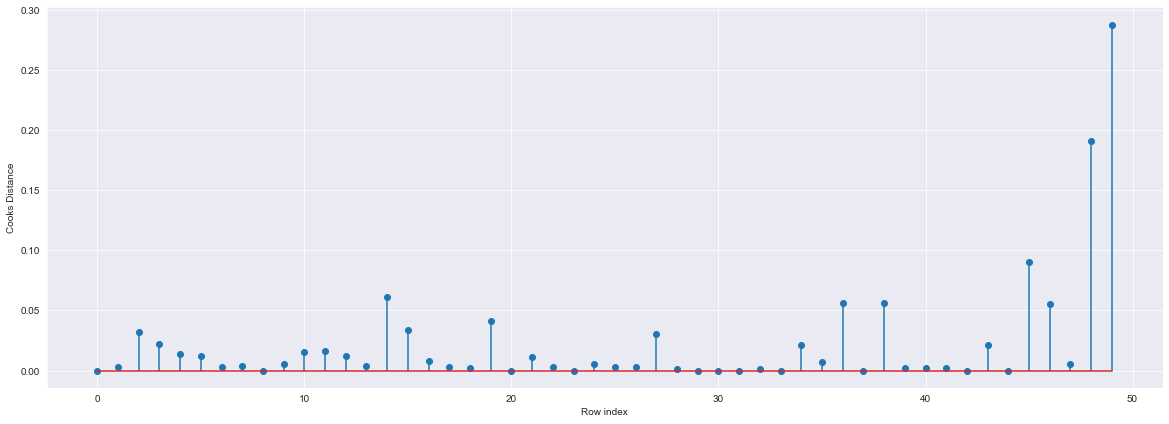

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(strtdata)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# as the points are less than 1.0 no need remove any points
# lets check the influece plot 

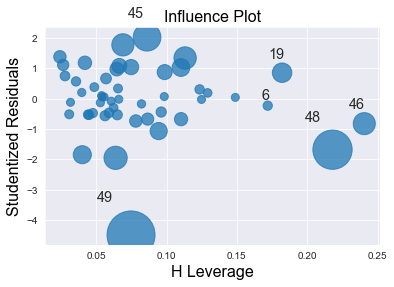

In [71]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [40]:
# points of 6, 19 ,45, 46, 48, 49 seems very influencing
# lets physicall examin the data

In [41]:
strtdata_c[strtdata_c.index.isin([6,19,44,45,46,48, 49])]
# though  they are non null values their magnitude not fitting the general range so we can remove them
# so that theywill not drag the regression towards them

,RDSpend,Admin,MrktSpend,State,Profit
6,134615.46,147198.87,127716.82,California,156122.51
19,86419.70,153514.11,0.00,New York,122776.86
44,22177.74,154806.14,28334.72,California,65200.33
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [44]:
newdata=pd.read_csv('50_Startups.csv')

In [45]:
#Removing the influencing pints are outliers

In [46]:
strtdata_new =newdata.drop(strtdata_c.index[[6,19,44,46, 47,48, 49]],axis=0)

In [47]:
# resetting the index
strtdata_new2 = strtdata_new.reset_index(drop=True)

In [48]:
cols = {'R&D Spend': 'RDSpend', 'Administration':'Admin', 'Marketing Spend': 'MrktSpend', 'State':'State',
       'Profit':'Profit'}

In [49]:
strtdata_new3 = strtdata_new2.rename (columns= cols , inplace = False)

In [50]:
strtdata_new3.head()

,RDSpend,Admin,MrktSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
# the data also contains categorical variables
# inorder to include them in the regression lets creat dummies
# as the existing of all dummies might ose colinearity problem wr will remove one


In [52]:
strtdata_dum = pd.get_dummies(strtdata_new3, drop_first=True)

In [53]:
strtdata_dum.head()

,RDSpend,Admin,MrktSpend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [54]:
strtdata_dum.corr()

,RDSpend,Admin,MrktSpend,Profit,State_Florida,State_New York
RDSpend,1.000000,0.218978,0.803745,0.974950,0.106091,0.009441
Admin,0.218978,1.000000,-0.013836,0.161453,0.039210,0.091389
MrktSpend,0.803745,-0.013836,1.000000,0.825042,0.069222,-0.007205
Profit,0.974950,0.161453,0.825042,1.000000,0.096442,-0.012382
State_Florida,0.106091,0.039210,0.069222,0.096442,1.000000,-0.535714
State_New York,0.009441,0.091389,-0.007205,-0.012382,-0.535714,1.000000


In [55]:
# Defining inputs and targets
# your choice
targets=strtdata_dum['Profit']
inputs = strtdata_dum.drop(['Profit'], axis =1)


In [56]:
inputs.head()

,RDSpend,Admin,MrktSpend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [59]:
cols = {'R&D Spend': 'RDSpend', 'Administration':'Admin', 'Marketing Spend': 'MrktSpend', 'State':'State',
       'Profit':'Profit','State_Florida': 'SoF','State_New York': 'SoNY'}

In [60]:
# Changing column names
strtdata_dum2 = strtdata_dum.rename (columns= cols , inplace = False)

In [61]:
# as data is ready. lets build the model

Final_model = smf.ols('Profit~RDSpend+Admin+MrktSpend+SoF+SoNY',data=strtdata_dum2).fit()

In [62]:
# finding r square
(Final_model.rsquared,Final_model.aic)

(0.9569985356309558, 895.671828130722)

In [63]:
f_model_influence = Final_model.get_influence()
(c, _) = f_model_influence.cooks_distance

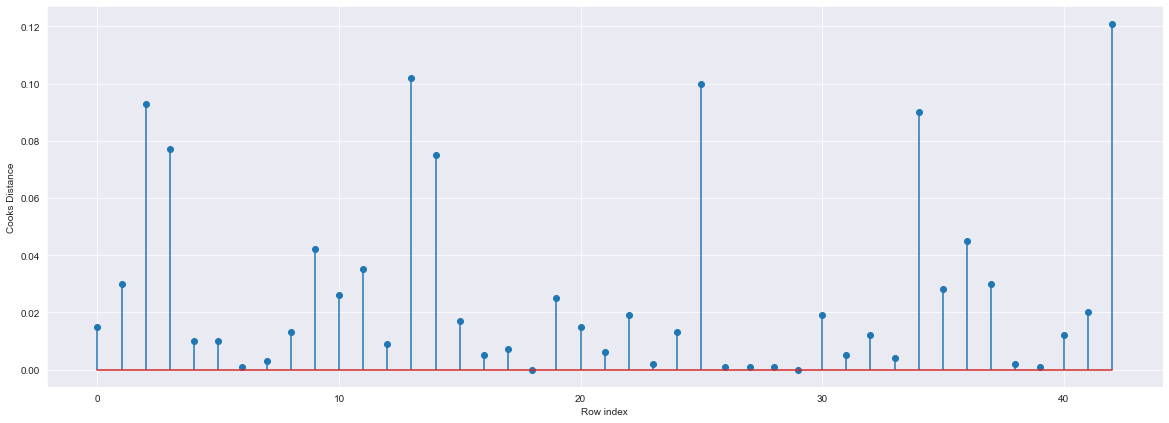

In [65]:
# checking the data for outliers and influencers

fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(strtdata_dum2)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
# it seems as there are no points to be removed 

In [66]:
Final_model.summary()

# R-Squared is good. so we can conclude the model



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     164.7
Date:                Fri, 21 May 2021   Prob (F-statistic):           3.25e-24
Time:                        17:23:21   Log-Likelihood:                -441.84
No. Observations:                  43   AIC:                             895.7
Df Residuals:                      37   BIC:                             906.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.858e+04   6287.359      9.318      0.000    4.58e+04    7.13e+04
RDSpend        0.7414      0.051     14.529      0.000       0.638       0.845
Admin         -0.0409      0.047     -0.866      0.392      -0.137       0.055
MrktSpend      0.0306      0.019      1.610      0.116      -0.008       0.069
SoF        -1436.8595   2902.081     -0.495      0.623   -7317.035    4443.316
SoNY       -1997.4390   2896.883     -0.690      0.495   -7867.082    3872.204
==============================================================================
Omnibus:                        0.591   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.698
Skew:                           0.140   Prob(JB):                        0.705
Kurtosis:                       2.442   Cond. No.                     1.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
#creating New data for prediction
pred_strtdata=pd.DataFrame({'RDSpend':[160000,150000, 14000], 'Admin':[90333, 12000, 15000], 'MrktSpend':[450123,403265,345826], 
                            'SoF':[1,0,0], 'SoNY':[0,1,0]})

In [70]:
pred_strtdata

,RDSpend,Admin,MrktSpend,SoF,SoNY
0,160000,90333,450123,1,0
1,150000,12000,403265,0,1
2,14000,15000,345826,0,0


In [71]:
# predicting the values of profit
Final_model.predict(pred_strtdata)


0    185854.425142
1    179649.921834
2     78935.103228
dtype: float64

In [ ]:
# now let us build model by removing the admin as it is not influencing as seen from p vlues in partial correlation

In [89]:
Final_model2 = smf.ols('Profit~RDSpend+MrktSpend+SoF+SoNY',data=strtdata_dum2).fit()

In [96]:
# finding r square
(Final_model2.rsquared,Final_model2.aic)

(0.9561274029916578, 894.534224995346)

In [ ]:
#Now from the fina_model it is also observed that the state is also has lower p value let us check for the r square
#by removing state

In [93]:

Final_model3 = smf.ols('Profit~RDSpend+Admin+MrktSpend',data=strtdata_dum2).fit()

In [112]:

# finding r square
(Final_model3.rsquared,Final_model3.aic)

(0.9564221384276478, 892.244376961609)

In [113]:
Final_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     285.3
Date:                Fri, 21 May 2021   Prob (F-statistic):           1.45e-26
Time:                        17:47:56   Log-Likelihood:                -442.12
No. Observations:                  43   AIC:                             892.2
Df Residuals:                      39   BIC:                             899.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.793e+04   6083.706      9.522      0.000    4.56e+04    7.02e+04
RDSpend        0.7396      0.050     14.833      0.000       0.639       0.840
Admin         -0.0445      0.046     -0.968      0.339      -0.138       0.049
MrktSpend      0.0308      0.019      1.652      0.107      -0.007       0.068
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.658
Skew:                           0.053   Prob(JB):                        0.720
Kurtosis:                       2.403   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# from the summary tables 
#the r squared dropped from final model to final model3 though it is miniscule
#but adjusted r square is increased
# the final model 3 AI also less so we can use the last model as best model though the differesce is less